In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import torch

/home/ghamon/miniconda3/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
print(sns.color_palette("Set2"))
a=sns.color_palette("Set2")
set_color_a=[]
for i in [0,1,2,3,6,4,7,5]:
    set_color_a.append(a[i])


set_color_b=[]
for i in [0,1,2,3,4,5]:
    set_color_b.append(a[i])


[(0.4, 0.7607843137254902, 0.6470588235294118), (0.9882352941176471, 0.5529411764705883, 0.3843137254901961), (0.5529411764705883, 0.6274509803921569, 0.796078431372549), (0.9058823529411765, 0.5411764705882353, 0.7647058823529411), (0.6509803921568628, 0.8470588235294118, 0.32941176470588235), (1.0, 0.8509803921568627, 0.1843137254901961), (0.8980392156862745, 0.7686274509803922, 0.5803921568627451), (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]


118
tensor(115)


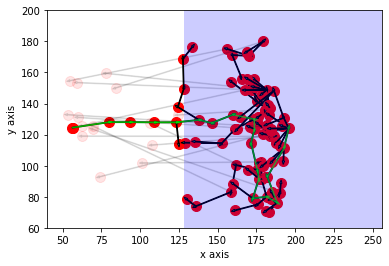

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from addict import Dict
p1=[]
p2=[]
best=-10
besti=-1
parents=[None]*40
seed=9

file="imgep_exploration/all_parameters/repetition_00000"+str(seed)+"/"
for i in range(160):

  nb=i
  if(nb<10):
    a=torch.load(file+"run_000000"+str(nb)+"_data.pickle",map_location=torch.device('cpu'))
  elif(nb<100):
    a=torch.load(file+"run_00000"+str(nb)+"_data.pickle",map_location=torch.device('cpu'))
  elif(nb<1000):
    a=torch.load(file+"run_0000"+str(nb)+"_data.pickle",map_location=torch.device('cpu'))
  else:
    a=torch.load(file+"run_000"+str(nb)+"_data.pickle",map_location=torch.device('cpu'))

  #print(a['policy_parameters']["update_rule"]['R'])
  x=-a["reached_goal"][2]*256+128
  y=a["reached_goal"][1]*256+128
  p1.append(x)
  p2.append(y)
  if(x>best and a["reached_goal"][0]<0.11):
    besti=i
    best=x
  if(i>39):
    parent=a["source_policy_idx"]
    parents.append(parent)


  if(a["reached_goal"][0]<0.11):

    #if(i%5==0 or (i>40 and i<48)):
      #print(a["reached_goal"])
      policy_parameters = Dict.fromkeys(['initialization', 'update_rule'])
      policy_parameters['initialization']=a['policy_parameters']['initialization']
      policy_parameters['update_rule']=a['policy_parameters']['update_rule']
      if(i>39):

        pcx,pcy=(p1[parent],p2[parent])
        if((x-pcx).abs()<30):
          #plt.scatter(x,y,s=100,color=(1,1-i/160,1-i/160,1))
          plt.scatter(x,y,s=100,color=(1,0,0,1))
          plt.arrow(pcx,pcy,(x-pcx),(y-pcy),width=0.5)
        else:
          plt.scatter(x,y,s=100,color=(1,0,0,0.1))
          plt.arrow(pcx,pcy,(x-pcx),(y-pcy),width=0.5,color=(0,0,0,0.1))

      else:
        plt.scatter(x,y,s=100,color=(1,0,0,1))

print(besti)
i=besti
p=parents[besti]
print(p)
while p!=None:

  x,y=(p1[i],p2[i])
  pcx,pcy=(p1[p],p2[p])
  plt.arrow(pcx,pcy,(x-pcx),(y-pcy),width=0.5,color=(0,1,0,0.5))

  i=p
  p=parents[i]


ax=plt.gca()
rect = patches.Rectangle((128, 60), 128, 140, linewidth=1, facecolor=(0,0,1,0.2))

# Add the patch to the Axes
ax.add_patch(rect)





#plt.gca().set_aspect('equal')
plt.ylim((60,200))
plt.xlim((40,256))
#plt.axis('off')
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.savefig("figures/philogeny_seed"+str(seed)+".pdf")
plt.show()





IMGEP
moving nb= 486
random
moving nb= 30
imgep_no_obs
moving nb= 387
imgep random sample
moving nb= 110
imgep no grad
moving nb= 17
handmade
moving nb= 150


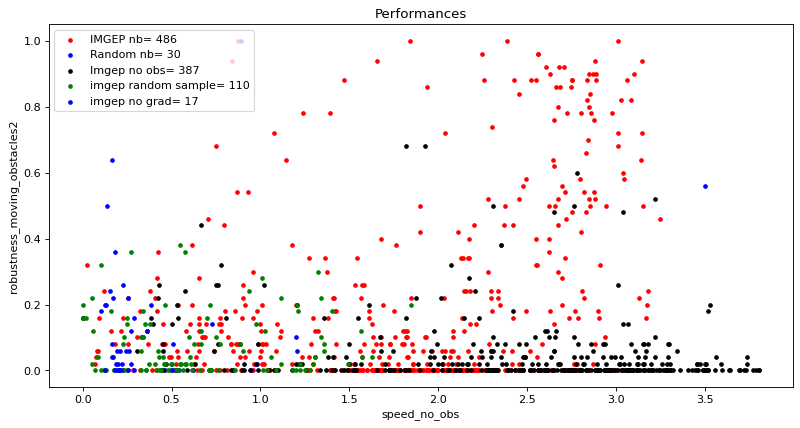

In [22]:
threshold_speed=0
nb_bins=5
bins=np.linspace(-0.3,0.4,nb_bins)
bins=np.array([-0.35,-0.17,-0.05,0.1,0.3])

x="speed_obs"
x="speed_no_obs"
y="robustness_obstacles"
y="robustness_moving_obstacles2"
expe=0
prop=0.39
#prop=1
gl="target"
alpha=1.
dot_size=10
plt.figure(figsize=(12, 6), dpi=80)

speed=[]
robu=[]
with open("creatures_categories.json", 'r') as f:
      data_crea = json.load(f)
      data_imgep=data_crea["imgep_exploration"]
print("IMGEP")
ctr_moving=0
for i in range(10):



    with open("imgep_exploration/perfs_seed"+str(i)+'_b.json', 'r') as f:
      data = json.load(f)
    for key in data.keys():
        id=int(key[-3:])
        if(data_imgep[key]["is_moving"]):
            ctr_moving+=1
            speed.append(data[key][x])
            robu.append(data[key][y])

print("moving nb= "+str(ctr_moving))
#sns.kdeplot(x=speed,y=robu, fill=True,color='red',alpha=0.5)
plt.scatter(speed,robu,color="red",s=dot_size,alpha=alpha,label="IMGEP nb= "+str(ctr_moving))
#sns.scatterplot(x=speed,y=robu,color='red')
                 



ctr=0
# Random 
print("random")
speed=[]
robu=[]
with open("creatures_categories.json", 'r') as f:
      data_crea = json.load(f)
      data_random=data_crea["random_exploration"]
ctr_moving=0
for i in range(10):        
    m_rd_mov=[]
    m_rd=[]

    with open("random_exploration/perfs_seed"+str(i)+'_b.json', 'r') as f:
      data = json.load(f)
    total=len(data.keys())
    
    ctr=0
    for key in data.keys():
            ctr+=1
            if(ctr>prop*total):
                break
        #if(data[key]['robustness_moving_obstacles1']>0.95):
            if(data_random[key]["is_moving"]):
                ctr_moving+=1
                speed.append(data[key][x])
                robu.append(data[key][y])
                  #if(data[key]['robustness_moving_obstacles1']>0.95):
#sns.kdeplot(x=speed,y=robu, fill=True,color='blue',alpha=0.8,grid_size=1000,levels=100) 
print("moving nb= "+str(ctr_moving))
plt.scatter(speed,robu,color="blue",s=dot_size,alpha=alpha,label="Random nb= "+str(ctr_moving))
#sns.scatterplot(x=speed,y=robu,color='blue')


print("imgep_no_obs")
speed=[]
robu=[]
ctr_moving=0
with open("creatures_categories.json", 'r') as f:
      data_crea = json.load(f)
data_random=data_crea["imgep_no_obstacles_exploration"]
for i in [0,1,2,3,4,5,6,7,8,9]:        


    with open("imgep_no_obstacles_exploration/perfs_seed"+str(i)+'_b.json', 'r') as f:
      data = json.load(f)
    total=len(data.keys())
    
    ctr=0
    for key in data.keys():
        ctr+=1

        #if(data[key]['robustness_moving_obstacles1']>0.95):
        if(data_random[key]["is_soliton"] and data_random[key]["is_long_term_stable"] and data_random[key]["is_robust"]):
            if(data_random[key]["is_moving"]):
                ctr_moving+=1
                speed.append(data[key][x])
                robu.append(data[key][y])
                  #if(data[key]['robustness_moving_obstacles1']>0.95):
#sns.kdeplot(x=speed,y=robu, fill=True,color='blue',alpha=0.8,grid_size=1000,levels=100) 
print("moving nb= "+str(ctr_moving))
plt.scatter(speed,robu,color="black",s=dot_size,alpha=alpha,label="Imgep no obs= "+str(ctr_moving))






print("imgep random sample")
speed=[]
robu=[]
ctr_moving=0
with open("creatures_categories_init.json", 'r') as f:
          data_crea = json.load(f)
          data_curi_no_imgep=data_crea["imgep_random_sample_init_exploration"]

for i in [0,1,2,3,4,5,6,7,8,9]:        


    with open("imgep_random_sample_init_exploration/perfs_seed"+str(i)+'.json', 'r') as f:
          data = json.load(f)
    total=len(data.keys())
    
    ctr=0
    for key in data.keys():
        ctr+=1

        #if(data[key]['robustness_moving_obstacles1']>0.95):
        if(data_curi_no_imgep[key]["is_soliton"] and data_curi_no_imgep[key]["is_long_term_stable"] and data_curi_no_imgep[key]["is_robust"]):
            if(data_curi_no_imgep[key]["is_moving"]):
                ctr_moving+=1
                speed.append(data[key][x])
                robu.append(data[key][y])
                
                
#sns.kdeplot(x=speed,y=robu, fill=True,color='blue',alpha=0.8,grid_size=1000,levels=100) 
print("moving nb= "+str(ctr_moving))
plt.scatter(speed,robu,color="green",s=dot_size,alpha=alpha,label="imgep random sample= "+str(ctr_moving))



print("imgep no grad")
speed=[]
robu=[]
ctr_moving=0
with open("creatures_categories_init.json", 'r') as f:
          data_crea = json.load(f)
          data_curi_no_imgep=data_crea["imgep_no_grad_init_exploration"]

for i in [0,1,2,3,4,5,6,7,8,9]:        


    with open("imgep_no_grad_init_exploration/perfs_seed"+str(i)+'.json', 'r') as f:
          data = json.load(f)
    total=len(data.keys())
    
    ctr=0
    for key in data.keys():
            ctr+=1

        #if(data[key]['robustness_moving_obstacles1']>0.95):
            if(data_curi_no_imgep[key]["is_moving"]):
                ctr_moving+=1
                speed.append(data[key][x])
                robu.append(data[key][y])
                  #if(data[key]['robustness_moving_obstacles1']>0.95):
#sns.kdeplot(x=speed,y=robu, fill=True,color='blue',alpha=0.8,grid_size=1000,levels=100) 
print("moving nb= "+str(ctr_moving))
plt.scatter(speed,robu,color="blue",s=dot_size,alpha=alpha,label="imgep no grad= "+str(ctr_moving))



print("handmade")
ctr_moving=0
speed=[]
robu=[]
with open("handmade_exploration/perfs_b.json", 'r') as f:
  data = json.load(f)
with open("creatures_categories.json", 'r') as f:
  data_crea = json.load(f)
  data_handmade=data_crea["handmade_exploration"]

for key in data.keys():
    #if(data[key]['robustness_moving_obstacles1']>0.95):
        if(data_handmade[key]["is_moving"]):
            ctr_moving+=1
            speed.append(data[key][x])
            robu.append(data[key][y])
                  #if(data[key]['robustness_moving_obstacles1']>0.95):
#sns.kdeplot(x=speed,y=robu, fill=True,color='green',alpha=0.8,grid_size=1000)   
print("moving nb= "+str(ctr_moving))
#plt.scatter(speed,robu,color="green",s=dot_size,alpha=alpha,label="handmade nb= "+str(ctr_moving))
#sns.scatterplot(x=speed,y=robu,color='green')
plt.legend(prop={'size': 10})
plt.xlabel(x)
plt.ylabel(y)
plt.title("Performances")
plt.savefig("figures/scatter_random_imgep_moving_obstacle2.pdf")
plt.show()


        


IMGEP
moving nb= 486
0
random
moving nb= 30
moving nb= 387
moving nb= 150


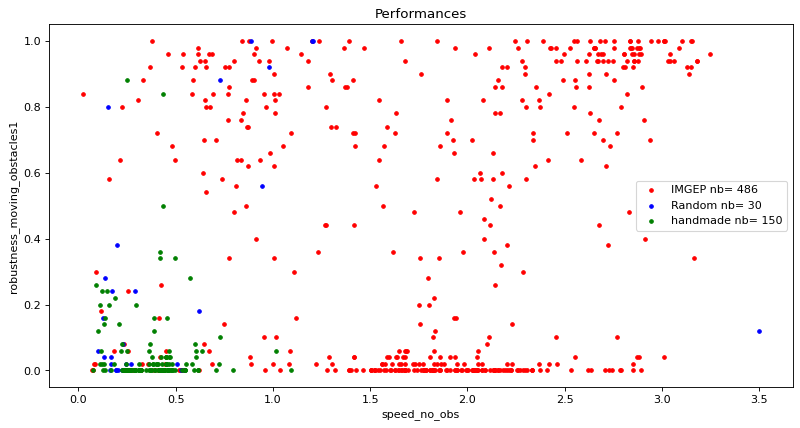

In [19]:
threshold_speed=0
nb_bins=5
bins=np.linspace(-0.3,0.4,nb_bins)
bins=np.array([-0.5,-0.17,-0.05,0.1,0.5])

#x="speed_obs"
x="speed_no_obs"
y="robustness_obstacles"
y="robustness_moving_obstacles1"
expe=0
prop=0.39
#prop=1
gl="target"
alpha=1.
dot_size=10
plt.figure(figsize=(12, 6), dpi=80)
ctr=0
speed=[]
robu=[]
with open("creatures_categories.json", 'r') as f:
      data_crea = json.load(f)
      data_imgep=data_crea["imgep_exploration"]
print("IMGEP")
ctr_moving=0
for i in range(10):

  

    with open("imgep_exploration/perfs_seed"+str(i)+'_b.json', 'r') as f:
        data = json.load(f)
        for key in data.keys():
            id=int(key[-3:])


            if(data_imgep[key]["is_moving"]):
                ctr_moving+=1
                speed.append(data[key][x])
                robu.append(data[key][y])
                        #if(data[key]['robustness_obstacles']>0.95):
                            #print(key,data[key]['speed_obs'])
print("moving nb= "+str(ctr_moving))
#sns.kdeplot(x=speed,y=robu, fill=True,color='red',alpha=0.5)
plt.scatter(speed,robu,color="red",s=dot_size,alpha=alpha,label="IMGEP nb= "+str(ctr_moving))
#sns.scatterplot(x=speed,y=robu,color='red')
                 

print(ctr)

ctr=0
# Random 
print("random")
speed=[]
robu=[]
with open("creatures_categories.json", 'r') as f:
      data_crea = json.load(f)
      data_random=data_crea["random_exploration"]
ctr_moving=0
for i in range(10):        
    m_rd_mov=[]
    m_rd=[]

    with open("random_exploration/perfs_seed"+str(i)+'_b.json', 'r') as f:
      data = json.load(f)
    total=len(data.keys())
    
    ctr=0
    for key in data.keys():
            ctr+=1
            if(ctr>prop*total):
                break
        #if(data[key]['robustness_moving_obstacles1']>0.95):
            if(data_random[key]["is_moving"]):
                ctr_moving+=1
                speed.append(data[key][x])
                robu.append(data[key][y])
                  #if(data[key]['robustness_moving_obstacles1']>0.95):
#sns.kdeplot(x=speed,y=robu, fill=True,color='blue',alpha=0.8,grid_size=1000,levels=100) 
print("moving nb= "+str(ctr_moving))
plt.scatter(speed,robu,color="blue",s=dot_size,alpha=alpha,label="Random nb= "+str(ctr_moving))
#sns.scatterplot(x=speed,y=robu,color='blue')

speed=[]
robu=[]
ctr_moving=0
with open("creatures_categories.json", 'r') as f:
      data_crea = json.load(f)
data_random=data_crea["imgep_no_obstacles_exploration"]
for i in [0,1,2,3,4,5,6,7,8,9]:        


    with open("imgep_no_obstacles_exploration/perfs_seed"+str(i)+'_b.json', 'r') as f:
      data = json.load(f)
    total=len(data.keys())
    
    ctr=0
    for key in data.keys():
        ctr+=1

        #if(data[key]['robustness_moving_obstacles1']>0.95):
        if(data_random[key]["is_soliton"] and data_random[key]["is_long_term_stable"] and data_random[key]["is_robust"]):
            if(data_random[key]["is_moving"]):
                ctr_moving+=1
                speed.append(data[key][x])
                robu.append(data[key][y])
                  #if(data[key]['robustness_moving_obstacles1']>0.95):
#sns.kdeplot(x=speed,y=robu, fill=True,color='blue',alpha=0.8,grid_size=1000,levels=100) 
print("moving nb= "+str(ctr_moving))
#plt.scatter(speed,robu,color="black",s=dot_size,alpha=alpha,label="Imgep no obs= "+str(ctr_moving))


ctr_moving=0
speed=[]
robu=[]
with open("handmade_exploration/perfs_b.json", 'r') as f:
  data = json.load(f)
with open("creatures_categories.json", 'r') as f:
  data_crea = json.load(f)
  data_handmade=data_crea["handmade_exploration"]

for key in data.keys():
    #if(data[key]['robustness_moving_obstacles1']>0.95):
        if(data_handmade[key]["is_moving"]):
            ctr_moving+=1
            speed.append(data[key][x])
            robu.append(data[key][y])
                  #if(data[key]['robustness_moving_obstacles1']>0.95):
#sns.kdeplot(x=speed,y=robu, fill=True,color='green',alpha=0.8,grid_size=1000)   
print("moving nb= "+str(ctr_moving))
plt.scatter(speed,robu,color="green",s=dot_size,alpha=alpha,label="handmade nb= "+str(ctr_moving))
#sns.scatterplot(x=speed,y=robu,color='green')
plt.legend(prop={'size': 10})
plt.xlabel(x)
plt.ylabel(y)
plt.title("Performances")
plt.show()


        


IMGEP
moving nb= 486
0
random
moving nb= 30
moving nb= 387
moving nb= 150


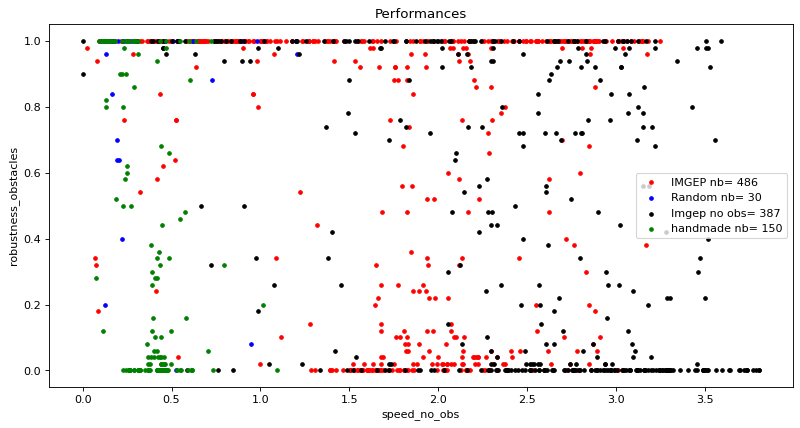

In [21]:
threshold_speed=0
nb_bins=5
bins=np.linspace(-0.3,0.4,nb_bins)
bins=np.array([-0.5,-0.17,-0.05,0.1,0.5])

#x="speed_obs"
x="speed_no_obs"
y="robustness_obstacles"
#y="robustness_moving_obstacles2"
expe=0
prop=0.39
#prop=1
gl="target"
alpha=1.
dot_size=10
plt.figure(figsize=(12, 6), dpi=80)
ctr=0
speed=[]
robu=[]
with open("creatures_categories.json", 'r') as f:
      data_crea = json.load(f)
      data_imgep=data_crea["imgep_exploration"]
print("IMGEP")
ctr_moving=0
for i in range(10):

    with open("imgep_exploration/perfs_seed"+str(i)+'_b.json', 'r') as f:
        data = json.load(f)
        for key in data.keys():
            id=int(key[-3:])
            if(data_imgep[key]["is_moving"]):
                ctr_moving+=1
                speed.append(data[key][x])
                robu.append(data[key][y])
                        #if(data[key]['robustness_obstacles']>0.95):
                            #print(key,data[key]['speed_obs'])
print("moving nb= "+str(ctr_moving))
#sns.kdeplot(x=speed,y=robu, fill=True,color='red',alpha=0.5)
plt.scatter(speed,robu,color="red",s=dot_size,alpha=alpha,label="IMGEP nb= "+str(ctr_moving))
#sns.scatterplot(x=speed,y=robu,color='red')
                 

print(ctr)

ctr=0
# Random 
print("random")
speed=[]
robu=[]
with open("creatures_categories.json", 'r') as f:
      data_crea = json.load(f)
      data_random=data_crea["random_exploration"]
ctr_moving=0
for i in range(10):        
    m_rd_mov=[]
    m_rd=[]

    with open("random_exploration/perfs_seed"+str(i)+'_b.json', 'r') as f:
      data = json.load(f)
    total=len(data.keys())
    
    ctr=0
    for key in data.keys():
            ctr+=1
            if(ctr>prop*total):
                break
        #if(data[key]['robustness_moving_obstacles1']>0.95):
            if(data_random[key]["is_moving"]):
                ctr_moving+=1
                speed.append(data[key][x])
                robu.append(data[key][y])
                  #if(data[key]['robustness_moving_obstacles1']>0.95):
#sns.kdeplot(x=speed,y=robu, fill=True,color='blue',alpha=0.8,grid_size=1000,levels=100) 
print("moving nb= "+str(ctr_moving))
plt.scatter(speed,robu,color="blue",s=dot_size,alpha=alpha,label="Random nb= "+str(ctr_moving))
#sns.scatterplot(x=speed,y=robu,color='blue')

speed=[]
robu=[]
ctr_moving=0
with open("creatures_categories.json", 'r') as f:
      data_crea = json.load(f)
data_random=data_crea["imgep_no_obstacles_exploration"]
for i in [0,1,2,3,4,5,6,7,8,9]:        


    with open("imgep_no_obstacles_exploration/perfs_seed"+str(i)+'_b.json', 'r') as f:
      data = json.load(f)
    total=len(data.keys())
    
    ctr=0
    for key in data.keys():
        ctr+=1

        #if(data[key]['robustness_moving_obstacles1']>0.95):
        if(data_random[key]["is_soliton"] and data_random[key]["is_long_term_stable"] and data_random[key]["is_robust"]):
            if(data_random[key]["is_moving"]):
                ctr_moving+=1
                speed.append(data[key][x])
                robu.append(data[key][y])
                  #if(data[key]['robustness_moving_obstacles1']>0.95):
#sns.kdeplot(x=speed,y=robu, fill=True,color='blue',alpha=0.8,grid_size=1000,levels=100) 
print("moving nb= "+str(ctr_moving))
plt.scatter(speed,robu,color="black",s=dot_size,alpha=alpha,label="Imgep no obs= "+str(ctr_moving))



ctr_moving=0
speed=[]
robu=[]
with open("handmade_exploration/perfs_b.json", 'r') as f:
  data = json.load(f)
with open("creatures_categories.json", 'r') as f:
  data_crea = json.load(f)
  data_handmade=data_crea["handmade_exploration"]

for key in data.keys():
    #if(data[key]['robustness_moving_obstacles1']>0.95):
        if(data_handmade[key]["is_moving"]):
            ctr_moving+=1
            speed.append(data[key][x])
            robu.append(data[key][y])
                  #if(data[key]['robustness_moving_obstacles1']>0.95):
#sns.kdeplot(x=speed,y=robu, fill=True,color='green',alpha=0.8,grid_size=1000)   
print("moving nb= "+str(ctr_moving))
plt.scatter(speed,robu,color="green",s=dot_size,alpha=alpha,label="handmade nb= "+str(ctr_moving))
#sns.scatterplot(x=speed,y=robu,color='green')
plt.legend(prop={'size': 10})
plt.xlabel(x)
plt.ylabel(y)
plt.title("Performances")
plt.show()


        


## Table speed per seed

IMGEP
SEED0 agent= 107 agent+moving= 93 robust= 91 max speed_no_obs= 2.8 max speed_obs= 1.4
SEED1 agent= 64 agent+moving= 54 robust= 26 max speed_no_obs= 2.7 max speed_obs= 1.5
SEED2 agent= 33 agent+moving= 32 robust= 1 max speed_no_obs= 2.0 max speed_obs= 1.1
SEED3 agent= 18 agent+moving= 7 robust= 0 max speed_no_obs= 0.5 max speed_obs= 0.3
SEED4 agent= 35 agent+moving= 26 robust= 6 max speed_no_obs= 1.9 max speed_obs= 0.4
SEED5 agent= 66 agent+moving= 52 robust= 38 max speed_no_obs= 2.9 max speed_obs= 1.8
SEED6 agent= 54 agent+moving= 54 robust= 2 max speed_no_obs= 2.5 max speed_obs= 0.3
SEED7 agent= 30 agent+moving= 30 robust= 1 max speed_no_obs= 3.0 max speed_obs= 0.9
SEED8 agent= 44 agent+moving= 44 robust= 4 max speed_no_obs= 2.3 max speed_obs= 0.3
SEED9 agent= 104 agent+moving= 94 robust= 92 max speed_no_obs= 3.2 max speed_obs= 2.3


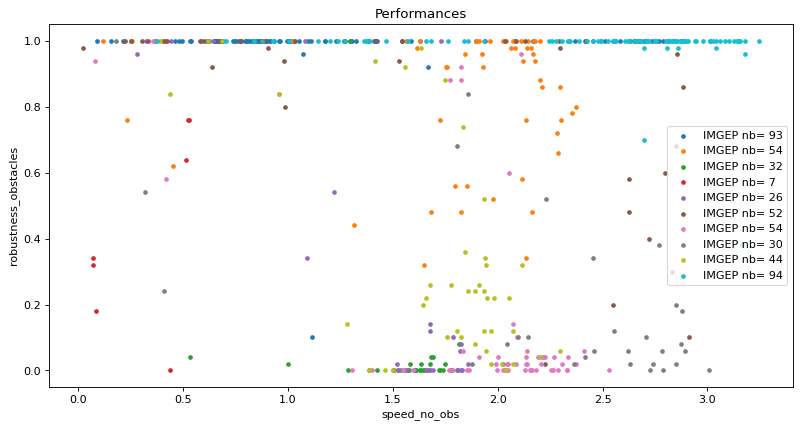

[2.818375261455601, 2.6543099369497303, 2.037962480359198, 0.5271486555651993, 1.861125566571335, 2.91179745625621, 2.5320969812408287, 3.0087151980439004, 2.2975886388952858, 3.2458903783655413]


In [4]:
threshold_speed=0


x="speed_no_obs"
y="robustness_obstacles"
expe=0
prop=0.39
#prop=1
gl="target"
alpha=1.
dot_size=10
plt.figure(figsize=(12, 6), dpi=80)


list_speed_obstacle=[]


with open("creatures_categories.json", 'r') as f:
      data_crea = json.load(f)
      data_imgep=data_crea["imgep_exploration"]
print("IMGEP")

for j in range(10):
    i=j

    b=np.load("../experiments/experiment_00002"+str(expe)+"/repetition_00000"+str(i)+"/"+gl+"_goal.npy")

    
    speed=[]
    speed_obs=[]
    robu=[]
    ctr_moving=0
    ctr_robust=0
    ctr_agent=0
    ctr_agent_moving=0

    
    with open("imgep_exploration/perfs_seed"+str(i)+'_b.json', 'r') as f:
      data = json.load(f)
    for key in data.keys():
        id=int(key[-3:])
        
        moving=data_imgep[key]["is_moving"]
              
        agent=data_imgep[key]["is_robust"] and data_imgep[key]["is_long_term_stable"] and data_imgep[key]["is_soliton"]
        if(agent):
            ctr_agent+=1
            if(moving):
              ctr_agent_moving+=1
        if(moving):
            ctr_moving+=1
            speed.append(data[key][x])
            robu.append(data[key][y])
            speed_obs.append(data[key]["speed_obs"])
            if(data[key]['robustness_obstacles']>0.95):
                ctr_robust+=1
    #print("moving= "+str(ctr_moving)+" robust= "+str(ctr_robust)+" agent= "+str(ctr_agent)+" agent+moving= "+str(ctr_agent_moving))
    speed=np.array(speed)
    list_speed_obstacle.append(np.max(speed))
    speed_obs=np.array(speed_obs)
    print("SEED"+str(j)+" agent= "+str(ctr_agent)+" agent+moving= "+str(ctr_agent_moving)+" robust= "+str(ctr_robust)+" max speed_no_obs= "+"{:1.1f}".format(np.max(speed))+" max speed_obs= "+"{:1.1f}".format(np.max(speed_obs)))
    plt.scatter(speed,robu,s=dot_size,alpha=alpha,label="IMGEP nb= "+str(ctr_moving))
    
#sns.scatterplot(x=speed,y=robu,color='red')
                 
plt.legend(prop={'size': 10})
#plt.xlim(-0.2,2.4)
plt.xlabel(x)
plt.ylabel(y)
plt.title("Performances")
plt.show()

print(list_speed_obstacle)

# Perfs ablations


imgep
261
imgep_no obs
103
imgep no grad
6
imgep random sample
80
a
486
390
17
110


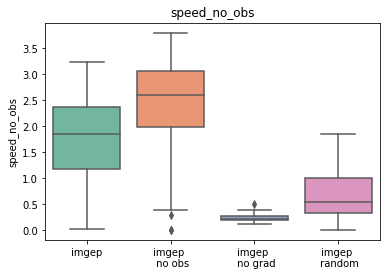

imgep
261
imgep_no obs
103
imgep no grad
6
imgep random sample
80
a
486
390
17
110


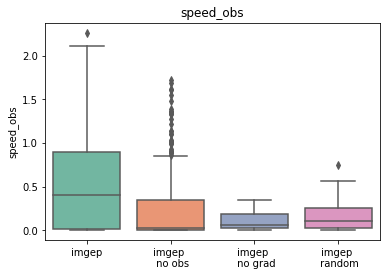

imgep
261
imgep_no obs
103
imgep no grad
6
imgep random sample
80
a
486
390
17
110


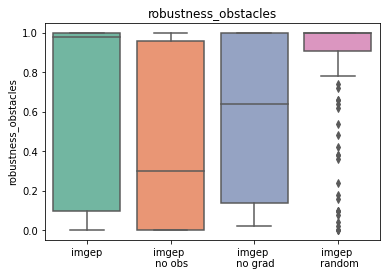

imgep
261
imgep_no obs
103
imgep no grad
6
imgep random sample
80
a
486
390
17
110


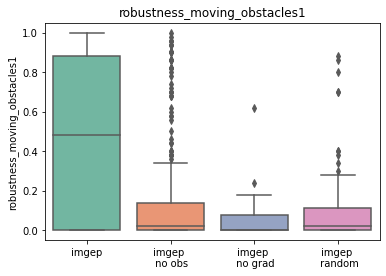

imgep
261
imgep_no obs
103
imgep no grad
6
imgep random sample
80
a
486
390
17
110


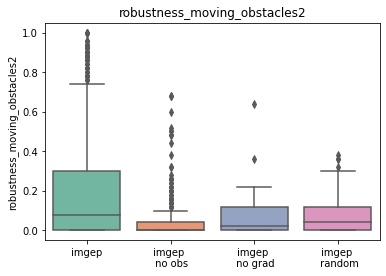

In [9]:
threshold_speed=0


expe=0
x="target"


for quantity in ['speed_no_obs','speed_obs','robustness_obstacles',"robustness_moving_obstacles1",'robustness_moving_obstacles2']:
    l=[]
    print("imgep")
    ctr=0
    
    with open("creatures_categories.json", 'r') as f:
      data_crea = json.load(f)
      data_imgep=data_crea["imgep_exploration"]
    for i in range(10):
        
        m=[]
        
        with open("imgep_exploration/perfs_seed"+str(i)+'_b.json', 'r') as f:
          data = json.load(f)
        for key in data.keys():
              id=int(key[-3:])

              if(data_imgep[key]["is_moving"]):
                #ctr+=1
                m.append(data[key][quantity])
                #if(quantity=='robustness_moving_obstacles2' and data[key][quantity]>0.9):
                #    print(key,data[key][quantity],data[key]['robustness_moving_obstacles1'],data[key]['speed_no_obs'],data[key]['speed_obs'])
                #    print()
                if(data[key]['robustness_obstacles']>0.95 ):
                    ctr+=1
                            
            
        if(i>0):
            l[-1].extend(m)
        else:
            l.append(m)
                
                
    print(ctr)
    

    
    
    ctr=0

  
    #imgep no obs
    
    
    with open("creatures_categories.json", 'r') as f:
          data_crea = json.load(f)
          data_imgep_no_obs=data_crea["imgep_no_obstacles_exploration"]
        
    print("imgep_no obs")
    for i in range(10):        
        m=[]

        with open("imgep_no_obstacles_exploration/perfs_seed"+str(i)+'_b.json', 'r') as f:
          data = json.load(f)
        
        total=len(data.keys())
    

        for key in data.keys():
            #if(data[key]['robustness_moving_obstacles1']>0.95):

                if(data_imgep_no_obs[key]["is_moving"]):
                    m.append(data[key][quantity])
                    if(data[key]['robustness_obstacles']>0.95):
                            ctr+=1

                
                
        if(i==0):     
            l.append(m)
        else:
            l[-1].extend(m)
    print(ctr)
    
    

    ctr=0
    print("imgep no grad")
    with open("creatures_categories_init.json", 'r') as f:
          data_crea = json.load(f)
          data_imgep_no_grad=data_crea["imgep_no_grad_init_exploration"]
        
    
    for i in range(10):        
        m=[]

        with open("imgep_no_grad_init_exploration/perfs_seed"+str(i)+'.json', 'r') as f:
          data = json.load(f)
        
        total=len(data.keys())

        for key in data.keys():
            #if(data[key]['robustness_moving_obstacles1']>0.95):

                if(data_imgep_no_grad[key]["is_moving"]):
                    m.append(data[key][quantity])
                    if(data[key]['robustness_obstacles']>0.95):
                            ctr+=1

                
                
        if(i==0):     
            l.append(m)
        else:
            l[-1].extend(m)
            
    print(ctr)
    
    ctr=0
    
    print("imgep random sample")
    with open("creatures_categories_init.json", 'r') as f:
          data_crea = json.load(f)
          data_imgep_random_sample=data_crea["imgep_random_sample_init_exploration"]
        
    
    for i in range(10):        
        m=[]

        with open("imgep_random_sample_init_exploration/perfs_seed"+str(i)+'.json', 'r') as f:
          data = json.load(f)
        
        total=len(data.keys())

        for key in data.keys():

                if(data_imgep_random_sample[key]["is_moving"]):
                    m.append(data[key][quantity])
                    if(data[key]['robustness_obstacles']>0.95):
                            ctr+=1
     
                
        if(i==0):     
            l.append(m)
        else:
            l[-1].extend(m)
    
    
    
    

    print(ctr)
     

    print("a")
    for alz in l:
        print(len(alz))
    lb=[]
    for i in [0,1,2,3]:
        lb.append(l[i])

    ax = sns.boxplot(data=lb,palette=sns.color_palette(set_color_b))
    labels = [item.get_text() for item in ax.get_xticklabels()]
    labels[0:11] = ["imgep","imgep \n no obs","imgep \n no grad","imgep \n random"]

    ax.set_xticklabels(labels)
    plt.title(quantity)
    plt.ylabel(quantity)
    #plt.ylim([-0.2,4.2])
    plt.savefig("figures/ablation_"+quantity+".pdf")
    plt.show()
        


# dist target et reach btw Imgep and imgep random

a
tensor([ 0.0651, -0.2039, -0.3142])
(120,)
tensor([0.0650, 0.0000, 0.1900])
a
tensor([ 0.0659, -0.1696, -0.0448])
(120,)
tensor([0.0650, 0.0000, 0.1900])
a
tensor([0.0659, 0.0704, 0.2825])
(120,)
tensor([0.0650, 0.0000, 0.1900])
a
tensor([0.0631, 0.1958, 0.1572])
(120,)
tensor([0.0650, 0.0000, 0.1900])
a
tensor([ 0.0643, -0.0449, -0.1888])
(120,)
tensor([0.0650, 0.0000, 0.1900])
a
tensor([ 0.0651, -0.1215, -0.0648])
(120,)
tensor([0.0650, 0.0000, 0.1900])
a
tensor([ 0.0657, -0.1994, -0.3059])
(120,)
tensor([0.0650, 0.0000, 0.1900])
a
tensor([ 0.0618,  0.1181, -0.1401])
(120,)
tensor([0.0650, 0.0000, 0.1900])
a
tensor([0.0610, 0.0236, 0.0638])
(120,)
tensor([0.0650, 0.0000, 0.1900])
a
tensor([ 0.0626, -0.0768,  0.0682])
(120,)
tensor([0.0650, 0.0000, 0.1900])


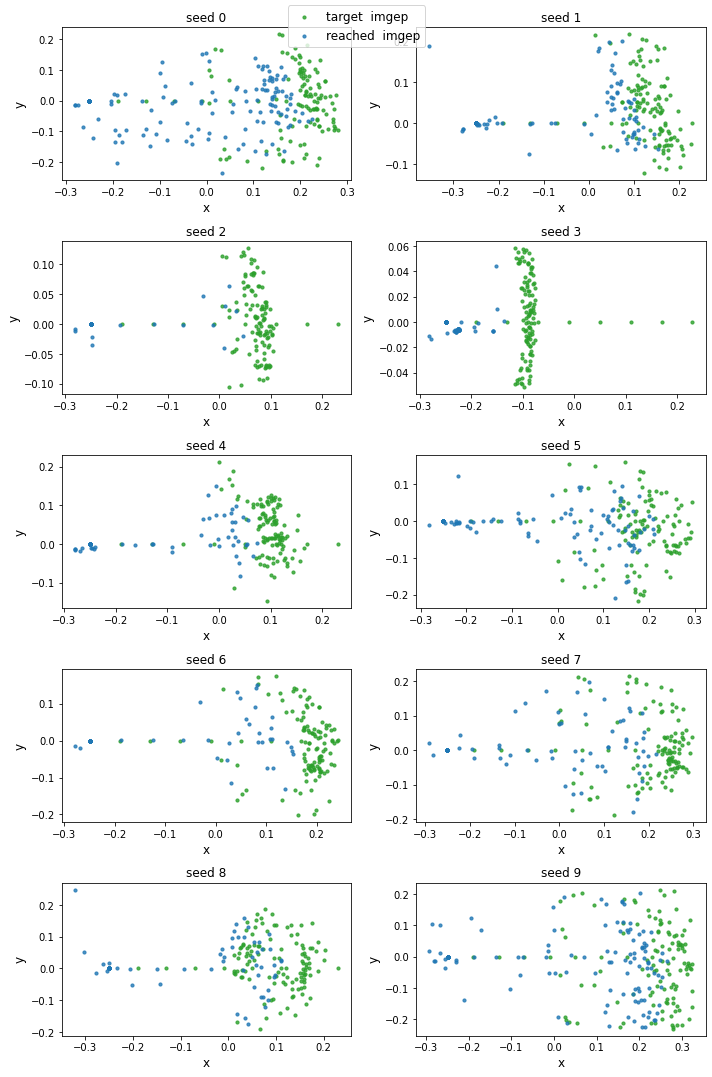

In [10]:

threshold_speed=0
nb_bins=5
bins=np.linspace(-0.3,0.4,nb_bins)
bins=np.array([-0.35,-0.17,-0.05,0.1,0.3])

x="speed_obs"
y="robustness_obstacles"
expe=0
prop=0.39
#prop=1
gl="target"
alpha=0.8
dot_size=10



fig, ax = plt.subplots(5,2, figsize=(10,15))
for i in range(10):
    
    
    
    plt.subplot(5,2,i+1)
    
#sns.scatterplot(x=speed,y=robu,color='red')
                
    ctr_moving=0

    list_target=[]
    list_reached=[]
    print("a")
    
    ctr=0
    for j in range(160):
        crea=torch.load("imgep_random_sample_init_exploration/all_parameters/repetition_00000"+str(i)+"/run_{number:07}_data.pickle".format(number=j),map_location=torch.device('cpu'))
        #print(crea["target_goal"])
        if(j>39):
            target=crea["target_goal"].numpy()
            list_target.append(target)
        if(j==40):
            print(crea["target_goal"])
        
        reached=crea["reached_goal"].numpy()
        reached_b=reached*1.0
        if(reached[0]>0.11 or reached[2]<-5):
            reached_b[2]=0.25
            reached_b[1]=0

        list_reached.append(reached_b)
        
        #dist_target.append(data[key][x])
        #dist_reached.append(data[key][y])
    

    list_reached=np.array(list_reached)
    list_target=np.array(list_target)
    
    
    dist_a=np.linalg.norm(list_reached[40:,1:]-list_target[:,1:],axis=1)
    print(dist_a.shape)
    #plt.plot(dist_a)
    #plt.scatter(list_reached[:,2],list_reached[:,1],s=dot_size,color="tab:red",alpha=alpha,label=" reached imgep random")
    #plt.scatter(list_target[:,2],list_target[:,1],s=dot_size,color="tab:orange",alpha=alpha,label="target imgep random")
    
    
    list_target=[]
    list_reached=[]
    
    
    for j in range(160):
        crea=torch.load("imgep_exploration/all_parameters/repetition_00000"+str(i)+"/run_{number:07}_data.pickle".format(number=j),map_location=torch.device('cpu'))
        #print(crea["target_goal"])
        if(j>39):
            target=crea["target_goal"].numpy()
            list_target.append(target)
        if(j==40):
            print(crea["target_goal"])
        
        reached=crea["reached_goal"].numpy()
        reached_b=reached*1.0
        if(reached[0]>0.11 or reached[2]<-5):
            reached_b[2]=0.25
            reached_b[1]=0

        list_reached.append(reached_b)

    list_reached=np.array(list_reached)
    list_target=np.array(list_target)
    

    plt.scatter(-list_target[:,2],list_target[:,1],s=dot_size,color="tab:green",alpha=alpha,label="target  imgep")
    plt.scatter(-list_reached[:,2],list_reached[:,1],s=dot_size,color="tab:blue",alpha=alpha,label=" reached  imgep")

    dist_b=np.linalg.norm(list_reached[40:,1:]-list_target[:,1:],axis=1)
    
    #plt.plot(dist_b)
    #sns.boxplot(data=[dist_a,dist_b],palette=sns.color_palette(set_color_b))
    #plt.scatter(speed,robu,s=dot_size,color='tab:blue',alpha=alpha,label="IMGEP nb= "+str(ctr_moving))

    
    #plt.xlim(-0.2,2.4)
    plt.xlabel("x",fontsize=12)
    plt.ylabel("y",fontsize=12)
    plt.title("seed "+str(i),fontsize=12)
    
fig.legend(labels=["target  imgep","reached  imgep"],prop={'size': 12},loc='upper center')
plt.tight_layout()
plt.savefig("figures/reched_target_imgep.pdf")
    

plt.show()



a
tensor([ 0.0651, -0.2039, -0.3142])
(120,)
tensor([0.0650, 0.0000, 0.1900])
a
tensor([ 0.0659, -0.1696, -0.0448])
(120,)
tensor([0.0650, 0.0000, 0.1900])
a
tensor([0.0659, 0.0704, 0.2825])
(120,)
tensor([0.0650, 0.0000, 0.1900])
a
tensor([0.0631, 0.1958, 0.1572])
(120,)
tensor([0.0650, 0.0000, 0.1900])
a
tensor([ 0.0643, -0.0449, -0.1888])
(120,)
tensor([0.0650, 0.0000, 0.1900])
a
tensor([ 0.0651, -0.1215, -0.0648])
(120,)
tensor([0.0650, 0.0000, 0.1900])
a
tensor([ 0.0657, -0.1994, -0.3059])
(120,)
tensor([0.0650, 0.0000, 0.1900])
a
tensor([ 0.0618,  0.1181, -0.1401])
(120,)
tensor([0.0650, 0.0000, 0.1900])
a
tensor([0.0610, 0.0236, 0.0638])
(120,)
tensor([0.0650, 0.0000, 0.1900])
a
tensor([ 0.0626, -0.0768,  0.0682])
(120,)
tensor([0.0650, 0.0000, 0.1900])


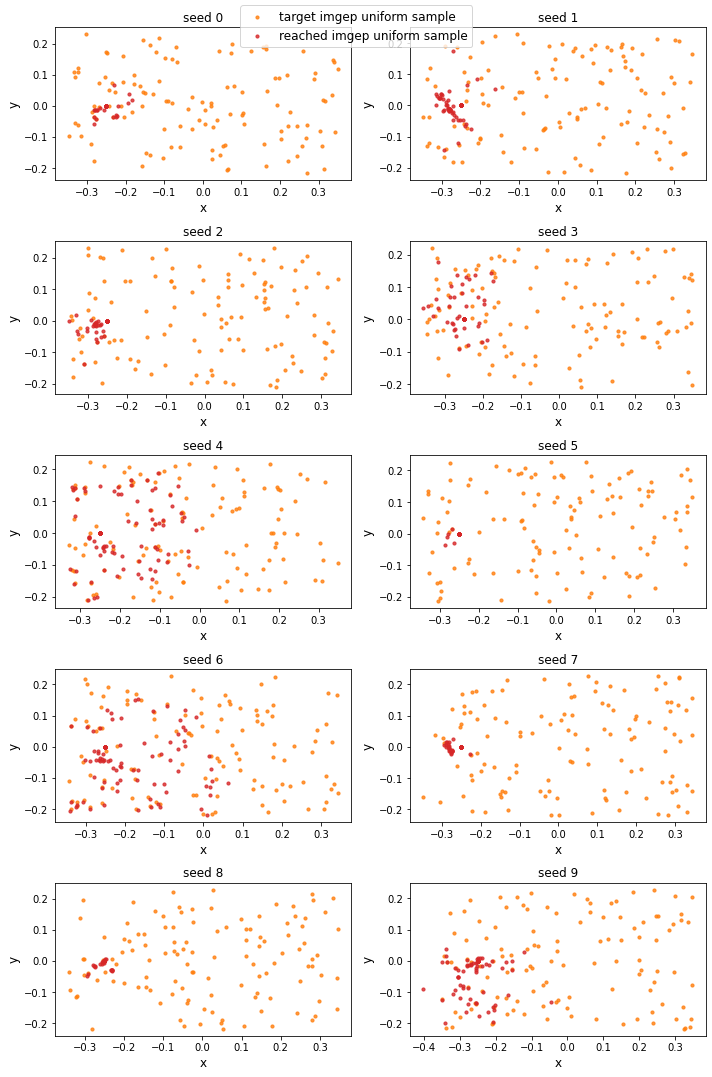

In [11]:

threshold_speed=0
nb_bins=5
bins=np.linspace(-0.3,0.4,nb_bins)
bins=np.array([-0.35,-0.17,-0.05,0.1,0.3])

x="speed_obs"
y="robustness_obstacles"
expe=0
prop=0.39
#prop=1
gl="target"
alpha=0.8
dot_size=10



fig, ax = plt.subplots(5,2, figsize=(10,15))
for i in range(10):
    
    
    plt.subplot(5,2,i+1)
    
#sns.scatterplot(x=speed,y=robu,color='red')
                
    ctr_moving=0

    list_target=[]
    list_reached=[]
    print("a")
    
    ctr=0
    for j in range(160):
        crea=torch.load("imgep_random_sample_init_exploration/all_parameters/repetition_00000"+str(i)+"/run_{number:07}_data.pickle".format(number=j),map_location=torch.device('cpu'))
        #print(crea["target_goal"])
        if(j>39):
            target=crea["target_goal"].numpy()
            list_target.append(target)
        if(j==40):
            print(crea["target_goal"])
        
        reached=crea["reached_goal"].numpy()
        reached_b=reached*1.0
        if(reached[0]>0.11 or reached[2]<-5):
            reached_b[2]=0.25
            reached_b[1]=0

        list_reached.append(reached_b)
        
        #dist_target.append(data[key][x])
        #dist_reached.append(data[key][y])
    

    list_reached=np.array(list_reached)
    list_target=np.array(list_target)
    
    
    dist_a=np.linalg.norm(list_reached[40:,1:]-list_target[:,1:],axis=1)
    print(dist_a.shape)
    #plt.plot(dist_a)
    plt.scatter(-list_target[:,2],list_target[:,1],s=dot_size,color="tab:orange",alpha=alpha,label="target imgep uniform sample")
    plt.scatter(-list_reached[:,2],list_reached[:,1],s=dot_size,color="tab:red",alpha=alpha,label="reached imgep uniform sample")
    
    
    
    list_target=[]
    list_reached=[]
    
    
    for j in range(160):
        crea=torch.load("imgep_exploration/all_parameters/repetition_00000"+str(i)+"/run_{number:07}_data.pickle".format(number=j),map_location=torch.device('cpu'))
        #print(crea["target_goal"])
        if(j>39):
            target=crea["target_goal"].numpy()
            list_target.append(target)
        if(j==40):
            print(crea["target_goal"])
        
        reached=crea["reached_goal"].numpy()
        reached_b=reached*1.0
        if(reached[0]>0.11 or reached[2]<-5):
            reached_b[2]=0.25
            reached_b[1]=0

        list_reached.append(reached_b)

    list_reached=np.array(list_reached)
    list_target=np.array(list_target)
    
    
    #plt.scatter(list_target[:,2],list_target[:,1],s=dot_size,color="tab:green",alpha=alpha,label="target  imgep")
    #plt.scatter(list_reached[:,2],list_reached[:,1],s=dot_size,color="tab:blue",alpha=alpha,label=" reached  imgep")
    dist_b=np.linalg.norm(list_reached[40:,1:]-list_target[:,1:],axis=1)
    
    #plt.plot(dist_b)
    #sns.boxplot(data=[dist_a,dist_b],palette=sns.color_palette(set_color_b))
    #plt.scatter(speed,robu,s=dot_size,color='tab:blue',alpha=alpha,label="IMGEP nb= "+str(ctr_moving))

    
    #plt.xlim(-0.2,2.4)
    plt.xlabel("x",fontsize=12)
    plt.ylabel("y",fontsize=12)
    plt.title("seed "+str(i),fontsize=12)
    
fig.legend(labels=["target imgep uniform sample","reached imgep uniform sample"],prop={'size': 12},loc='upper center')
plt.tight_layout()
plt.savefig("figures/reched_target_randomimgep.pdf")

plt.show()

